## Importing Libraries and Files

In [14]:
#import Pandas, NumPy, and Matplotlib libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn

#Import data file
df = pd.read_csv(r'C:\Users\jesst\OneDrive\Desktop\Capstone\2022 pers QBE.csv')

## Checking Data Types and Checking for Null Values

In [15]:
#Check the data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1593 entries, 0 to 1592
Data columns (total 3 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Calc YR Salary             1593 non-null   object
 1   Yearly PERS Contributions  1593 non-null   object
 2   Age                        1593 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 37.5+ KB


In [16]:
#Check data to see how many tuples have a null value
df.isna().sum()

Calc YR Salary               0
Yearly PERS Contributions    0
Age                          0
dtype: int64

## Cleaning The Data

In [17]:
#Convert data in columns from string to float
cleaned_data = (df[['Age', 'Calc YR Salary', 'Yearly PERS Contributions']].replace( '[\$,) ]+','',regex=True ).replace( '[(]','-',regex=True ).astype(float))
cleaned_data.head()

,Age,Calc YR Salary,Yearly PERS Contributions
0,36.0,131820.43,40836.16
1,18.0,70699.09,21899.79
2,26.0,119490.28,37012.20
3,38.0,126717.01,39203.57
4,61.0,125525.01,38790.15


## Splitting The Columns of Data Into Separate Data Sets To Create Descriptive Graphs

In [18]:
#Split data columns into separate data files for plotting
age = cleaned_data.loc[:, 'Age'].values
yr_salary = cleaned_data.loc[:, 'Calc YR Salary'].values
pers_contributions = cleaned_data.loc[:, 'Yearly PERS Contributions'].values

## Checking For Outlying Data in the Data Sets Using Graphs

(array([    0., 10000., 20000., 30000., 40000., 50000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

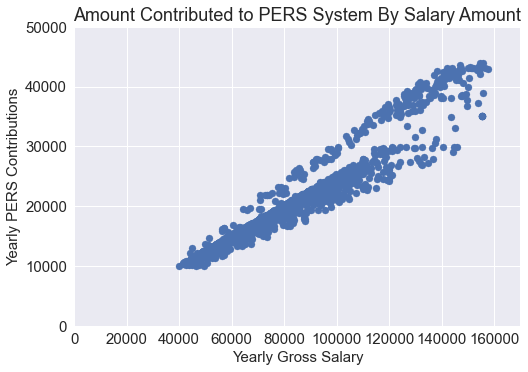

In [19]:
#Create scatter plot showing linear correlation of 'yearly salary' and 'pers contribution' values and evaluation of data points
plt.style.use('seaborn')
plt.scatter(yr_salary, pers_contributions)
plt.xlim(left = 0, right = 170000)  # <-- changes the graph length
plt.ylim(bottom = 0, top = 50000) # <-- changes the graph height
plt.xlabel('Yearly Gross Salary', fontsize = 15) #<-- changes the graph x label
plt.ylabel('Yearly PERS Contributions', fontsize = 15) #<-- changes the graph y label
plt.title('Amount Contributed to PERS System By Salary Amount', fontsize = 18) #<--adds a title to the graph 
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)

(array([    0., 10000., 20000., 30000., 40000., 50000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

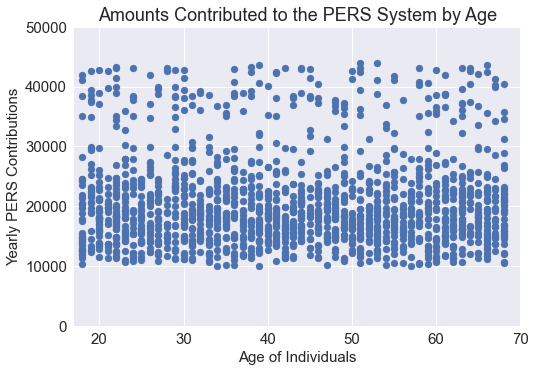

In [20]:
#Create scatter plot showing correlation of 'age' and 'pers contribution' values for evaluation of data points
plt.scatter(age, pers_contributions)
plt.xlim(left = 17, right = 70)  # <-- changes the graph length
plt.ylim(bottom = 0, top = 50000) # <-- changes the graph height
plt.xlabel('Age of Individuals', fontsize = 15) #<-- changes the graph x label
plt.ylabel('Yearly PERS Contributions', fontsize = 15) #<-- changes the graph y label
plt.title('Amounts Contributed to the PERS System by Age', fontsize = 18) #<--adds a title to the graph 
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)

(array([  0.,  50., 100., 150., 200., 250., 300., 350., 400.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

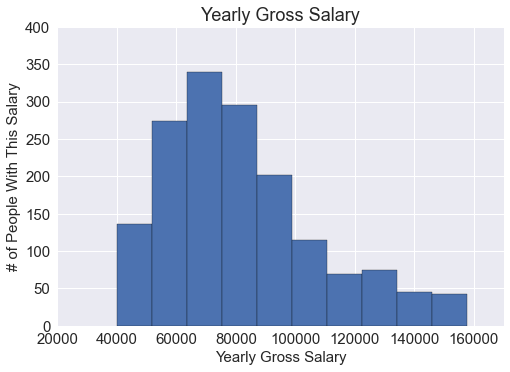

In [21]:
#Create histogram showing 'yearly salary' for evaluation
cleaned_data['Calc YR Salary'].hist(edgecolor = 'black')
plt.xlim(left = 20000, right = 170000)  # <-- changes the graph length
plt.ylim(bottom = 0, top = 400) # <-- changes the graph height
plt.xlabel('Yearly Gross Salary', fontsize = 15) #<-- changes the graph x label
plt.ylabel('# of People With This Salary', fontsize = 15) #<-- changes the graph y label
plt.title('Yearly Gross Salary', fontsize = 18) #<--adds a title to the graph 
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)

(array([  0.,  50., 100., 150., 200., 250., 300., 350., 400.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

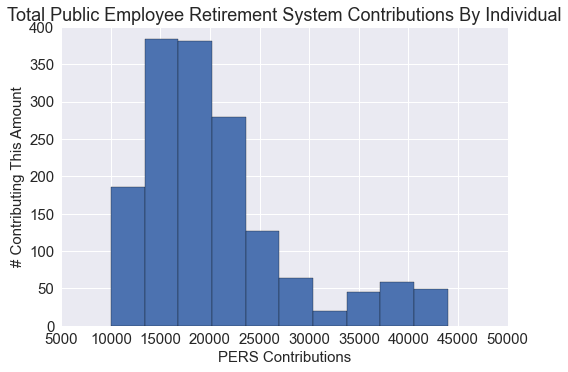

In [22]:
#Create histogram showing 'pers contributions' for evaluation
cleaned_data['Yearly PERS Contributions'].hist(edgecolor = 'black')
plt.xlim(left = 5000, right = 50000)  # <-- changes the graph length
plt.ylim(bottom = 0, top = 400) # <-- changes the graph height
plt.xlabel('PERS Contributions', fontsize = 15) #<-- changes the graph x label
plt.ylabel('# Contributing This Amount', fontsize = 15) #<-- changes the graph y label
plt.title('Total Public Employee Retirement System Contributions By Individual', fontsize = 18) #<--adds a title to the graph 
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)

## Split Original Cleaned Data Into Training and Testing Data Sets

In [23]:
#Import the TrainTestSplit class 
from sklearn.model_selection import train_test_split as tts

#Split the data into X and y sets(X = features, y = labels)
X = cleaned_data.drop("Yearly PERS Contributions", axis=1)
y = cleaned_data["Yearly PERS Contributions"]

#Split the data into test and training sets
X_train, X_test, y_train, y_test = tts(X, y, test_size = 0.2)

## Creation of the Linear Regression Model and Fitting (Training) the Model

In [24]:
#Import the RandomForestRegressor class
from sklearn.linear_model import LinearRegression

regr = LinearRegression()

In [25]:
#Fit the linear Regression model using the training data
regr.fit(X_train, y_train)

LinearRegression()

## Testing the Data for Accuracy

In [26]:
#Test the RandomForestRegressor model using the test data and get the score
regr.score(X_test, y_test)

0.9058864189059714

In [27]:
#Use 'predict' on just the first 10 values in 'X_test' dataset to see what the model gives
results = regr.predict(X_test[:10])
results

array([18717.6191582 , 24209.18493255, 30576.67797519, 16792.35981248,
       14236.29192747, 15104.26514292, 12060.50941145, 16722.58723782,
       37890.78334508, 19948.35568065])

## Graphing Results From the Model to Confirm Accuracy 

(array([    0., 10000., 20000., 30000., 40000., 50000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

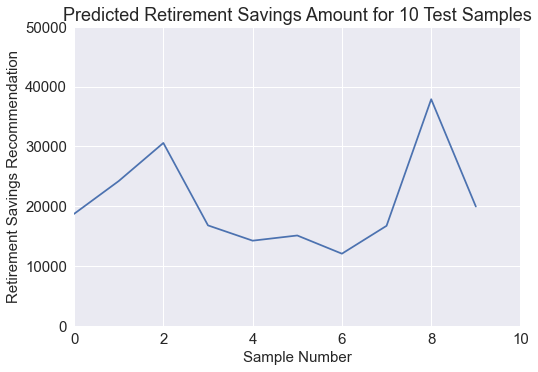

In [28]:
#Create line graph showing 'predict()' values for evaluation
plt.plot(results)
plt.xlim(left = 0, right = 10)  # <-- changes the graph length
plt.ylim(bottom = 0, top = 50000) # <-- changes the graph height
plt.xlabel('Sample Number', fontsize = 15) #<-- changes the graph x label
plt.ylabel('Retirement Savings Recommendation', fontsize = 15) #<-- changes the graph y label
plt.title('Predicted Retirement Savings Amount for 10 Test Samples', fontsize = 18) #<--adds a title to the graph 
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)

In [29]:
#Compare predicted amounts to the truth labels to evaluate the model
y_preds = regr.predict(X_test)
np.array(y_preds)

array([18717.6191582 , 24209.18493255, 30576.67797519, 16792.35981248,
       14236.29192747, 15104.26514292, 12060.50941145, 16722.58723782,
       37890.78334508, 19948.35568065, 14382.02961434, 21238.14161058,
       19684.79583723, 25141.12871785, 15077.26704586, 12488.66420344,
       12582.15758083, 16118.55727325, 24878.89540781, 16705.68561099,
       17301.94871239, 15324.75747886, 21121.69921698, 18546.67908914,
       34404.9535142 , 37812.12224159, 24273.78980369, 19540.78080078,
       26009.65591121, 10979.41882216, 22074.69271478, 23811.17796727,
       25381.62199239, 12398.41576815, 20214.59067709, 19212.9225196 ,
       16130.10439451, 16947.2850104 , 20269.49877879, 11232.75694068,
       22565.78158874, 32333.58333701, 24437.56636291, 31938.05871487,
       34016.83172005, 39725.98259859, 35493.21144481, 12948.88263096,
       16654.69376706, 20640.14378452, 20740.96394108, 26826.65307436,
       19903.53734742, 13300.45308761, 16732.2769015 , 22999.77715272,
      

In [30]:
#Import 'mean_absolute_error' to evaluate accuracy of the Linear Regression model
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_preds, y_test)

1414.224085345276

(array([ 5000., 10000., 15000., 20000., 25000., 30000., 35000., 40000.,
        45000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

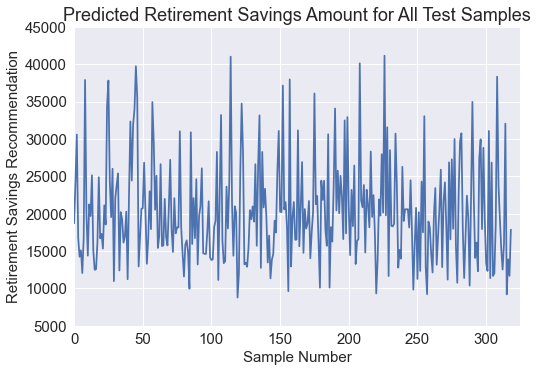

In [31]:
#Create line graph showing 'predict()' values for evaluation, to make sure there are no very low or very high predictions
plt.plot(y_preds)
plt.xlim(left = 0, right = 325)  # <-- changes the graph length
plt.ylim(bottom = 5000, top = 45000) # <-- changes the graph height
plt.xlabel('Sample Number', fontsize = 15) #<-- changes the graph x label
plt.ylabel('Retirement Savings Recommendation', fontsize = 15) #<-- changes the graph y label
plt.title('Predicted Retirement Savings Amount for All Test Samples', fontsize = 18) #<--adds a title to the graph 
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)

## User Interface for Interaction With the Linear Regression Model

In [35]:
#Web UI using pywebio
import pywebio
from pywebio.input import *
from pywebio.output import *

def retirement_ui():
    
    #user input fields creation for getting user's 'age' and 'gross yearly salary' values to pass to the predict() function
    age = input("Please enter your age as a number: ", type = NUMBER)
    salary = input("please enter your gross yearly salary as a number: ", type = NUMBER)
    
    age_entry = int(age)
    salary_entry = int(salary)
    data_set = {'col1': [age_entry, salary_entry]}
    entry = pd.DataFrame(data=data_set)
    
    reshaped_entry = entry.to_numpy().T

    #pass user inputs to predict() function
    estimate = regr.predict(reshaped_entry) 
    this_estimate = float(estimate)

    #Output results to the screen
    put_text('The ideal amount for you to put away for retirement each year is: ')
    put_text(this_estimate)
    
retirement_ui()    

SessionClosedException: 